In [27]:
# 3 spin example
import numpy as np
from numpy import linalg as LA


I = np.identity((2))
X = [[0,1],[1,0]]
Z = [[1,0],[0,-1]]
z1 = np.kron(Z,np.kron(I,I))
z2 = np.kron(I,np.kron(Z,I))
z3 = np.kron(I,np.kron(I,Z))

x1 = np.kron(X,np.kron(I,I))
x2 = np.kron(I,np.kron(X,I))
x3 = np.kron(I,np.kron(I,X))

J = [1,0.75,0.5]

zs = J[0]*np.dot(z1,z2)+J[1]*np.dot(z2,z3)+J[2]*np.dot(z1,z3)
xs = x1+x2+x3

H = zs 
e_val,e_vect = LA.eig(H)
print(e_val)
print(e_vect)

[ 2.25 -0.25 -1.25 -0.75 -0.75 -1.25 -0.25  2.25]
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [31]:
# Ground state X and Z

I = np.identity((2))
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
h_z = 1
h_x = 1

def H(t):
    return(h_z*lambda_t(t)*Z + h_x*(1-lambda_t(t))*X)

# Print GS for lambda = 0, lambda = 1, note the LA.eig might not return ordred 
# e_vals and e_vect 
e_val_1,e_vect_1 = LA.eig(H(0))
e_val_2,e_vect_2 = LA.eig(H(T))


print("Eigenvalues for lambda = 0: " + str(e_val_1))
print("Eigenstates for lambda = 0: " + str(e_vect_1))

print("Eigenvalues for lambda = 1: " + str(e_val_2))
print("Eigenstates for lambda = 1: " + str(e_vect_2))


'\ndef H(t):\n    return(h_z*lambda_t(t)*Z + h_x*(1-lambda_t(t))*X)\n\n# Print GS for lambda = 0, lambda = 1, note the LA.eig might not return ordred \n# e_vals and e_vect \ne_val_1,e_vect_1 = LA.eig(H(0))\ne_val_2,e_vect_2 = LA.eig(H(T))\n\n\nprint("Eigenvalues for lambda = 0: " + str(e_val_1))\nprint("Eigenstates for lambda = 0: " + str(e_vect_1))\n\nprint("Eigenvalues for lambda = 1: " + str(e_val_2))\nprint("Eigenstates for lambda = 1: " + str(e_vect_2))\n'

In [10]:
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Single spin annealing
# H(lambda) = lambda(t)*h_z*fermi_Z + (1-lambda(t))*h_x*fermi_X
# h = h_z = h_x, assume for now h = 1
# let total time T = 100
# let lamdba(t) = t(1/100), so a linear lambda for now

def F_single_spin(h_x,h_z,T,dt):

    I = np.identity((2))
    X = np.array([[0,1],[1,0]])
    Z = np.array([[1,0],[0,-1]])

    def H(t):
        return(h_z*lambda_t(t,T)*Z + h_x*(1-lambda_t(t,T))*X)

    # Print GS for lambda = 0, lambda = 1, note the LA.eig might not return ordred 
    # e_vals and e_vect 
    e_val_1,e_vect_1 = LA.eig(H(0))
    e_val_2,e_vect_2 = LA.eig(H(T))

    '''
    print("Eigenvalues for lambda = 0: " + str(e_val_1))
    print("Eigenstates for lambda = 0: " + str(e_vect_1))

    print("Eigenvalues for lambda = 1: " + str(e_val_2))
    print("Eigenstates for lambda = 1: " + str(e_vect_2))
    '''

    # set state 0 as the ground state (lowest eigenvalue) of lambda = 0 hamiltonian
    # for state_0, want e_val = -1 corresponding e_state is 1/sqrt(2)[1,-1]
    # for state_T, want e_val = -1 corresponding e_state is 1/sqrt(2)[0,1]
    state_0_gs = e_vect_1[0]
    state_T_gs = e_vect_2[1]


    # Now do Trotter decomposition for good time step (small enough to approximate cross 
    #                                                                                term)
    # remember e^(xA) = 1 + xA + 1/2 x^2 (A)^2 + O(x^3)
    # also, P pauli, e^(i*a*P) = I*cos(a) + i*A*sin(a)
    # note state(t + dt) = exp{-i*H(t)dt} * state(0)
    # and trotter:  
    # exp{-i*H(t)dt} = exp{-i*h_z*lambda_t(t)*Z*dt}*exp{-i*h_x*(1-lambda_t(t))*X*dt}
    #                                                                       *exp{O(dt^2)}
    # dropping O(dt^2) for small dt -> 0
    # state(t + dt) = exp{-i*h_z*lambda_t(t)*Z*dt}*exp{-i*h_x*(1-lambda_t(t))*X*dt} 
    #                                                                             *state(0)
    # get the final state
    # dt = 0.01 
    steps = int(T/dt)
    state_T = state_0_gs

    '''
    arr = np.arange(0,T,dt)
    plt.plot(lambda_t(arr))
    plt.xlabel("time")
    plt.ylabel("$\lambda(t)$")
    plt.title("Shape of $\lambda$")
    plt.show
    '''

    for i in range(steps):
        im = complex(0,1) # define the imaginary unit
        exp1 = expm(-im*h_z*lambda_t(i*dt,T)*Z*dt)
        exp2 = expm(-im*h_x*(1-lambda_t(i*dt,T))*X*dt)
        exps = np.dot(exp1,exp2)
        state_T = np.dot(exps,state_T)

    # Compute fidelity: |<state_T_gs|state_T>|^2
    return abs(np.dot(state_T_gs,state_T))**2




<function matplotlib.pyplot.show(*args, **kw)>

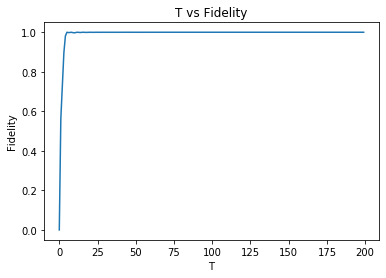

In [11]:
# let h_x = h_z = 1
# dt = 0.1
# define the linear lamda function given T
def lambda_t(t,T):
    if (T == 0):
        return 0
    return t*(1/T)

# Try diferent T's and test Fidelity
TS = np.arange(0,200)
FS = np.empty(TS.shape[0])

for i in range(TS.shape[0]):
    FS[i] = F_single_spin(1,1,TS[i],0.1)

    
plt.plot(TS,FS)
plt.xlabel("T")
plt.ylabel("Fidelity")
plt.title("T vs Fidelity")
plt.show


Fidelity for linear: 0.9999947929382582
Fidelity for tanh: 0.6794000848036618
Fidelity for arctan: 0.8666626287275968
Fidelity for $ln((1-e)*x/T + 1)$: 0.9999966096285944
Fidelity for $e^{x-T}$: 0.5229547905407862


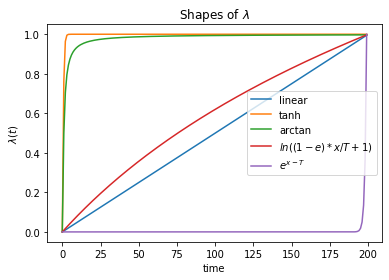

In [14]:
# fix T = 200, dt = 0.1, h_x = h_z = 1
# Now let's find an optimal lambda function
# Try linear
# for above linear try: tanh, arctan, (1-e^-x) and ln((e-1)x/T + 1)
# for below liear try: e^(x-T)


T = 200
dt = 0.1

arr = np.arange(0,T)    

ab1 = np.empty(arr.shape[0])
for i in range(arr.shape[0]):
    ab1[i] = 1-np.exp(-arr[i])
    

ab2 = np.empty(arr.shape[0])
for i in range(arr.shape[0]):
    ab2[i] = np.log((np.exp(1)-1)*arr[i]/T + 1)
    
bl1 = np.empty(arr.shape[0])
for i in range(arr.shape[0]):
    bl1[i] = np.exp(arr[i]-T+1)
    
plt.plot(arr/T, label = "linear")
plt.plot(np.tanh(arr), label = "tanh")
plt.plot(np.arctan(arr)/(np.pi/2), label = "arctan")  
plt.plot(ab2, label = "$ln((1-e)*x/T + 1)$")
plt.plot(bl1, label = "$e^{x-T}$")
plt.xlabel("time")
plt.ylabel("$\lambda(t)$")
plt.title("Shapes of $\lambda$")
plt.legend()
plt.show

# Linear 
def lambda_t(t,T):
    return t*(1/T)

print("Fidelity for linear: " + str(F_single_spin(1,1,T,0.1)))

# tanh 
def lambda_t(t,T):
    return np.tanh(t)

print("Fidelity for tanh: " + str(F_single_spin(1,1,T,0.1)))

# arctan 
def lambda_t(t,T):
    return np.arctan(t)/(np.pi/2)

print("Fidelity for arctan: " + str(F_single_spin(1,1,T,0.1)))


# ln((e-1)x/T + 1)
def lambda_t(t,T):
    return np.log((np.exp(1)-1)*t/T + 1)

print("Fidelity for $ln((1-e)*x/T + 1)$: " + str(F_single_spin(1,1,T,0.1)))

# e^{x-T}
def lambda_t(t,T):
    return np.exp(t-T+1)

print("Fidelity for $e^{x-T}$: " + str(F_single_spin(1,1,T,0.1)))


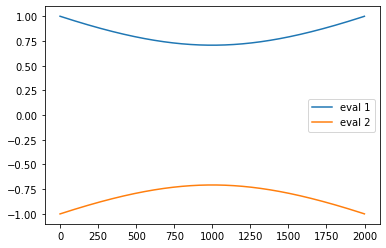

In [8]:
# Plot eigenvalues for fixed T say T = 50 and using linear lambda
# Linear 
def lambda_t(t,T):
    return t*(1/T)


def eigs_plot(h_x,h_z,T,dt):

    I = np.identity((2))
    X = np.array([[0,1],[1,0]])
    Z = np.array([[1,0],[0,-1]])

    def H(t):
        return(h_z*lambda_t(t,T)*Z + h_x*(1-lambda_t(t,T))*X)

    steps = int(T/dt)

    evals1 = np.empty(steps)
    evals2 = np.empty(steps)

    ar1 = np.arange(steps)
    for i in range(steps):
        e_val,e_vect = LA.eig(H(i*dt))
        evals1[i] = e_val[0]
        evals2[i] = e_val[1]
        
    plt.plot(ar1, evals1, label = "eval 1")
    plt.plot(ar1, evals2, label = "eval 2")
    plt.legend()
    plt.show()


eigs_plot(1,1,200,0.1)

